In [7]:
import site
site.addsitedir('..')
import menpo.io as mio
import menpodetect
import numpy as np
import facefit
%matplotlib inline
from facefit import esr, ert, lbf
from facefit.test import fit_all
from facefit import util

In [8]:
MODEL_NAME = "lbf-fast_lfpw+helen.hkl"

In [9]:
lfpw_train = util.read_images("../datasets/lfpw/trainset/", normalise=True)
lfpw_test = util.read_images("../datasets/lfpw/testset/", normalise=True)
helen_train = util.read_images("../datasets/helen_cropped/trainset_cropped", normalise=True)
helen_test = util.read_images("../datasets/helen_cropped/testset_cropped/", normalise=True)

- Loading 330 assets: [====================] 100%

In [12]:
train_images = np.concatenate([lfpw_train, helen_train])
test_images = np.concatenate([lfpw_test, helen_test])

In [ ]:
builder = lbf.LBFBuilder(n_stages=5, n_trees=300, tree_depth=5, n_perturbations=20, MU=0)

initial_errors, final_errors, initial_shapes, final_shapes, model = fit_all(builder, train_images, test_images, num_init=1)

Detecting face 833/2812

In [15]:
print "Mean initial error: {}".format(np.mean(initial_errors))
print "Mean final error: {}".format(np.mean(final_errors))

Mean initial error: 0.10884353332
Mean final error: 0.0254884393181


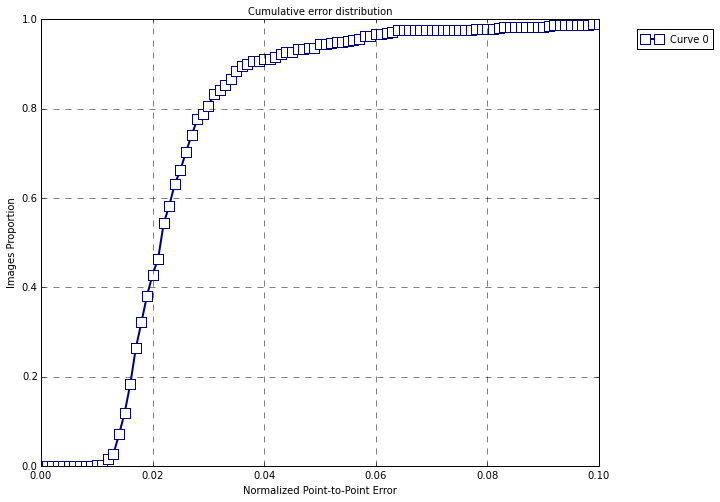

In [16]:
from menpofit.visualize import plot_ced
plot_ced(final_errors)

In [19]:
from facefit.test.end2end import test_model


In [21]:
initial_errors, final_errors, initial_shapes, final_shapes = test_model(model, test_images, num_init=5)

554/554

In [22]:
print "Mean initial error: {}".format(np.mean(initial_errors))
print "Mean final error: {}".format(np.mean(final_errors))

Mean initial error: 0.10884353332
Mean final error: 0.0264041762659


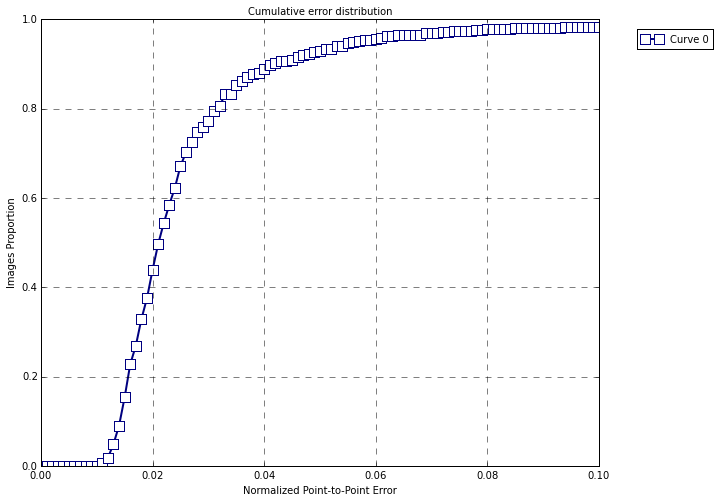

In [23]:
from menpofit.visualize import plot_ced
plot_ced(final_errors)

In [24]:
initial_errors, final_errors, initial_shapes, final_shapes = test_model(model, lfpw_test, num_init=1)

224/224

In [25]:
print "Mean initial error: {}".format(np.mean(initial_errors))
print "Mean final error: {}".format(np.mean(final_errors))

Mean initial error: 0.102570194775
Mean final error: 0.0234881140285


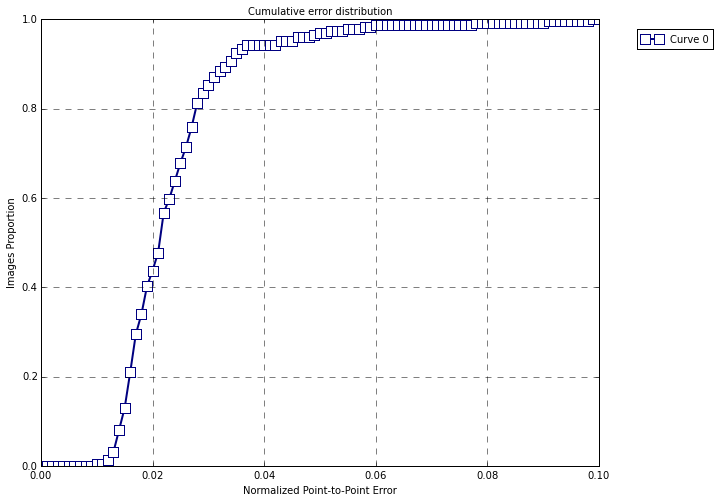

In [26]:
from menpofit.visualize import plot_ced
plot_ced(final_errors)

In [27]:
initial_errors, final_errors, initial_shapes, final_shapes = test_model(model, lfpw_test, num_init=5)

224/224

In [28]:
print "Mean initial error: {}".format(np.mean(initial_errors))
print "Mean final error: {}".format(np.mean(final_errors))

Mean initial error: 0.102570194775
Mean final error: 0.0237487028208


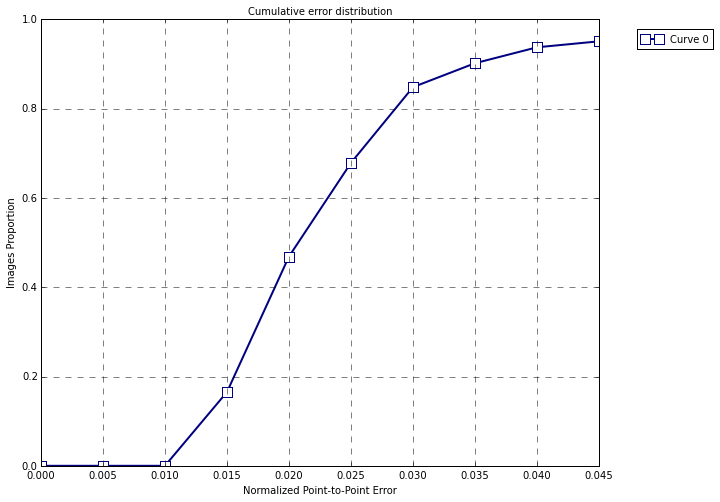

In [29]:
from menpofit.visualize import plot_ced
plot_ced(final_errors)